In [3]:
import numpy as np
import matplotlib
%matplotlib nbagg

from matplotlib import pyplot as plt
from dstpy3 import *
from optictools import *
from time import time
import scipy.io as sio




def pmax(t0): 
	return np.abs(b2)/gamma / t0**2

b2 = -23e-27
gamma = 0.0037
t0 = 1e-12



fr=0.05
tvec=np.linspace(-10e-12,10e-12,2**10)
t0 = fr * 20e-12
p = pmax(t0)
feld = 3.2* np.sqrt(p) / np.cosh( tvec/t0) * np.exp( -1.0j * 2 * np.pi * .01e12 * tvec)
dt = tvec[2]-tvec[1]

dob = DSTObj(feld, tvec, b2, gamma)

zetas = np.linspace(0, 1.1 * dob.zetamax,111)
if False:
    #abalgos:
    plt.figure()
    for k in dob.calc_ab_methodsdict.keys():
        t1 = time()
        a,b = dob.calc_ab(1.0j * zetas, method = k)
        t2 = time()

        ts = k+" %.2f"%(t2-t1)
        #plt.title(dob.calc_ab_methodnamesdict[k]+" %.2f"%(t2-t1))
        plt.plot(zetas, np.log(1./np.abs(a)), label=ts)
    plt.legend(loc=0)

    plt.figure()
    for k in dob.calc_abdiff_methodsdict.keys():
        t1 = time()
        a,b,ad,bd = dob.calc_abdiff(1.0j * zetas, method = k)
        t2 = time()

        ts = k+" %.2f"%(t2-t1)
        #plt.title(dob.calc_ab_methodnamesdict[k]+" %.2f"%(t2-t1))
        plt.plot(zetas, np.log(1./np.abs(a)), label=ts)
    plt.legend(loc=0)


#
# check whether it can handle scalar zeta input
#

if False:
    print(" ---- calc_ab Methods ----")
    for k in dob.calc_ab_methodsdict.keys():

        a,b = dob.calc_ab(1.0j * zetas[10], method = k)
        a2,b2 = dob.calc_ab(1.0j * zetas[10:12], method = k)
        print("--")
        print(a)
        print(a2)       
    print(" ---- calc_abdiff Methods ----")
    for k in dob.calc_abdiff_methodsdict.keys():
        print(k, dob.calc_abdiff_methodnamesdict[k])
        a,b, ad, bd = dob.calc_abdiff(1.0j * zetas[10], method = k)
        a2,b2, ad2, bd2 = dob.calc_abdiff(1.0j * zetas[10:12], method = k)
        print("--")
        print(a)
        print(a2)       
    

# check grid dependency

<IPython.core.display.Javascript object>


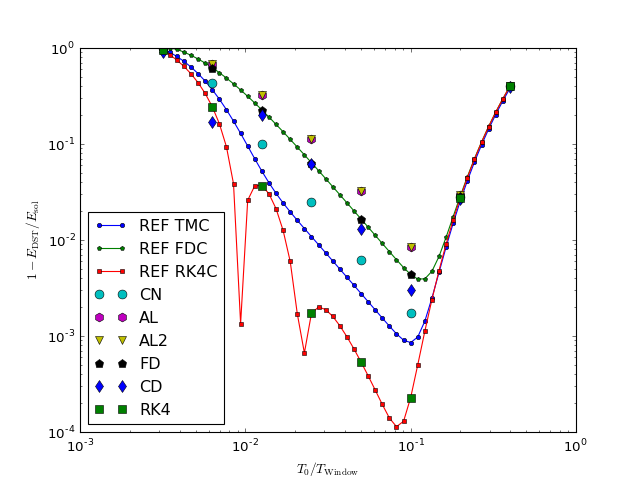

<IPython.core.display.Javascript object>


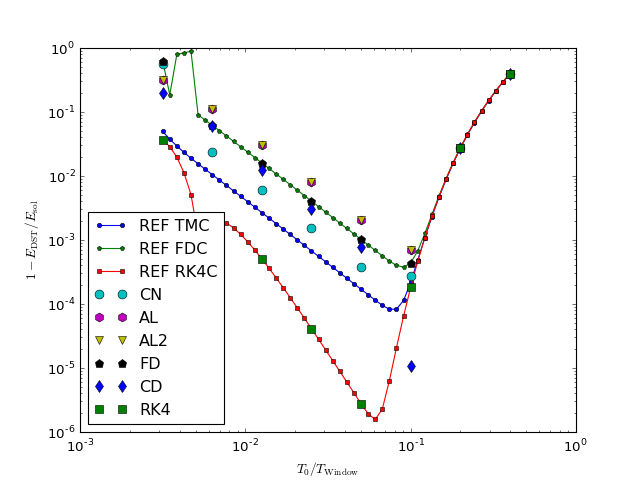

<IPython.core.display.Javascript object>


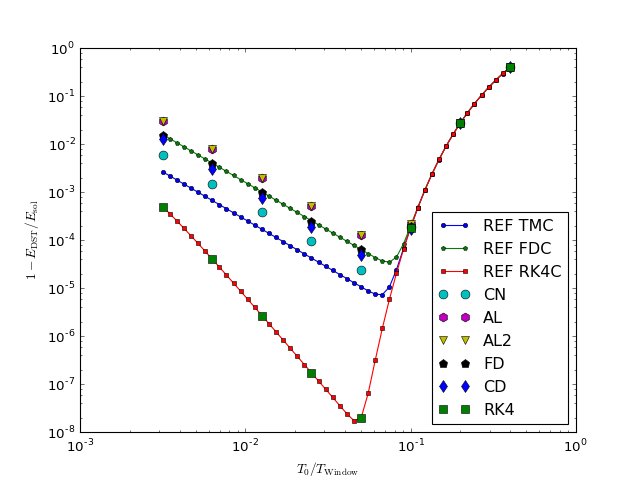

<IPython.core.display.Javascript object>


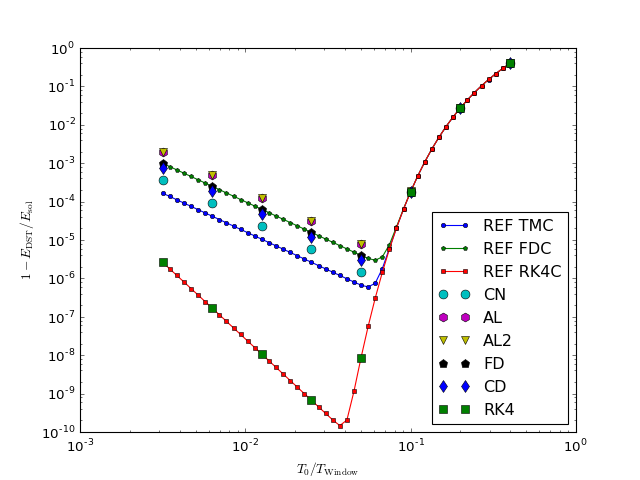

<IPython.core.display.Javascript object>


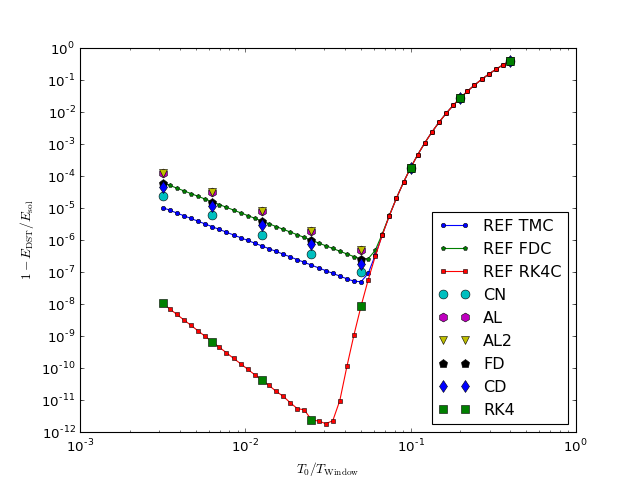

<IPython.core.display.Javascript object>


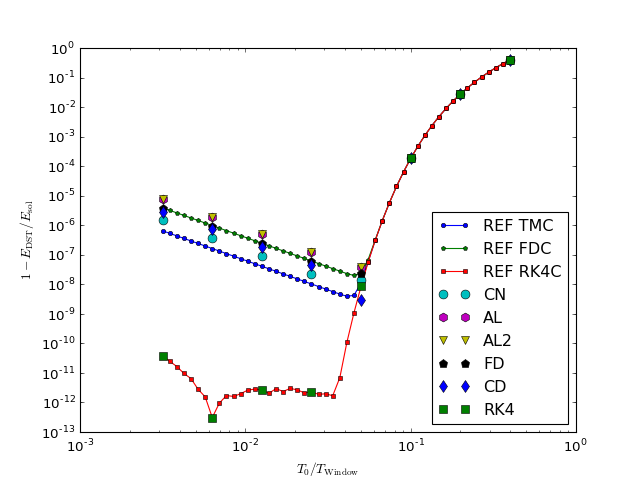

In [8]:


def pfloop3(do, inizetas, Meth, verbose=False, iterations=10):
	zetas = inizetas
	for i in range(iterations):
		aa,bb = do.calc_ab(1.0j*zetas, method=Meth)
		la = np.log(1./np.abs(aa)) 
		pl = pyfindpeaks(5,la,0)
		zpeak = zetas[pl[0]]
		zetas = np.linspace( (1-0.05**i)* zpeak, (1+0.05**i)*zpeak,len(inizetas))
		if verbose:
			if i==0:
				plt.figure()
				plt.plot(zetas,la)
				plt.plot(zetas[pl],la[pl],'o' )
			print("%d - %e	  la = %e"%(i, zpeak*4.0/do.energyfactor, la[pl[0]]))
	return zpeak
#
# ATTENTION: this literally can take HOURS
#
if False:
    from optictools import pyfindpeaks
    for NN in [6,8,10,12,14,16]:
        algos = ['CN','AL','AL2','FD','CD', 'RK4']    
        #algos=["RK4"]
        fracslo = 10**np.linspace(-2.5,-0.4,8)
        fracshi = 10**np.linspace(-2.5,-0.4,50)

        FRACM=[]
        FRACMTM = []
        for frac in fracslo:
            print(frac," * ",end="")
            tvec=np.linspace(-10e-12,10e-12,2**NN)
            t0 = frac * 20e-12
            p = pmax(t0)
            esol = 2 * t0 * p
            print(np.shape(frac), np.shape(t0),np.shape(p), np.shape(tvec))
            feld = 1.0* np.sqrt(p) / np.cosh( tvec/t0) #* np.exp( -1.0j * 2 * np.pi * .01e12 * tvec)
            dob = DSTObj( feld, tvec, b2, gamma)
            inizetas = np.linspace(1e-8,1.1 * dob.zetamax,50)
            ALGOM = [frac]
            for i in range(len(algos)):        
                zm = pfloop3(dob, inizetas, algos[i])
                ALGOM.append(1-zm*4.0/dob.energyfactor/esol)    
            FRACM.append(ALGOM)

        for frac in fracshi:
            tvec=np.linspace(-10e-12,10e-12,2**NN)
            t0 = frac * 20e-12
            p = pmax(t0)
            esol = 2 * t0 * p
            feld = 1.0* np.sqrt(p) / np.cosh( tvec/t0) #* np.exp( -1.0j * 2 * np.pi * .01e12 * tvec)
            dob = DSTObj( feld, tvec, b2, gamma)
            inizetas = np.linspace(1e-8,1.1 * dob.zetamax,50)
            zm = pfloop3(dob, inizetas,'TMC')
            zm2 = pfloop3(dob, inizetas,'FDC'     )
            zm3 = pfloop3(dob, inizetas,'RK4C'     )
            FRACMTM.append([frac, np.abs (1-zm*4.0 / dob.energyfactor / esol),
                           np.abs (1-zm2*4.0 / dob.energyfactor / esol),
                           np.abs (1-zm3*4.0 / dob.energyfactor / esol)])
        np.savetxt("testdata/algs%d.dat"%NN, F)
        np.savetxt("testdata/ref%d.dat"%NN, FRef)
            
if True:
   for NN in [6,8,10,12,14,16]:
        F=np.loadtxt( "testdata/algs%d.dat"%NN) 
        FRef = np.loadtxt("testdata/ref%d.dat"%NN)
        plt.figure()
        plt.loglog(FRef[:,0], FRef[:,1], 'o-', ms=4, label = "REF TMC")
        plt.loglog(FRef[:,0], FRef[:,2], 'p-', ms=4, label = "REF FDC")
        plt.loglog(FRef[:,0], FRef[:,3], 's-', ms=4, label = "REF RK4C")
        
        plt.loglog(F[:,0], F[:,1],'o', label = "CN", ms=8)
        plt.loglog(F[:,0], F[:,2],'h', label = "AL", ms=8)
        plt.loglog(F[:,0], F[:,3],'v', label = "AL2", ms=8)
        plt.loglog(F[:,0], F[:,4],'p', label = "FD", ms=8)
        plt.loglog(F[:,0], F[:,5],'d', label = "CD", ms=8)
        plt.loglog(F[:,0], F[:,6],'s', label = "RK4", ms=8)
        
        #plt.loglog(F[:,0], F[:,1],'s', label = "RK4", ms=8)

      
        plt.xlabel(r"$T_0 / T_{\rm Window}$")
        plt.ylabel(r"$1 - E_{\rm DST}/E_{\rm sol}$")    
        plt.legend(loc=0)
        plt.savefig("testdata/%d.pdf"%NN)

# check rootfinding

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<IPython.core.display.Javascript object>


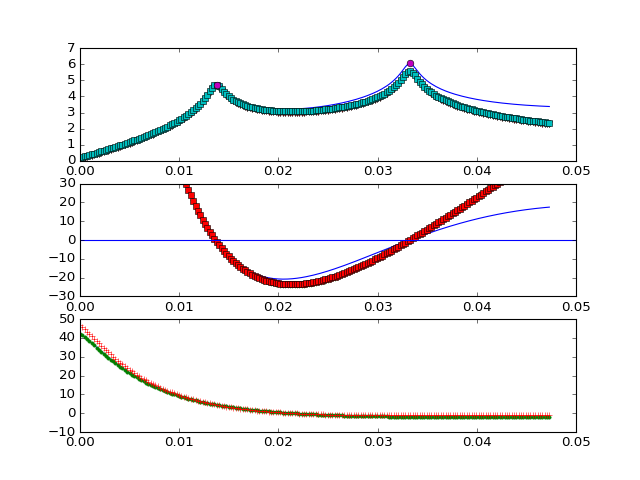

<IPython.core.display.Javascript object>


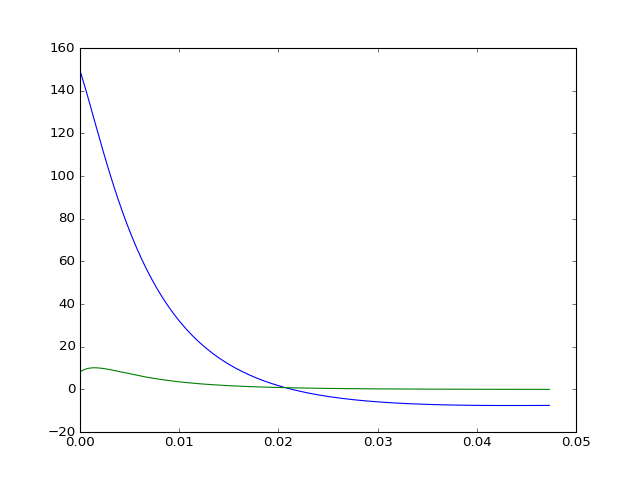

In [9]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib
%matplotlib nbagg

from matplotlib import pyplot as plt
from dstpy3 import *
from optictools import *
from time import time

from dstpy_rk4augdiff import calc_abdiff_rungekutta_augvanilla

def pmax(t0): 
	return np.abs(b2)/gamma / t0**2

b2 = -23e-27
gamma = 0.0037
t0 = 1e-12



fr=0.05
tvec=np.linspace(-10e-12,10e-12,2**10)
t0 = fr * 20e-12
p = pmax(t0)
feld = 2.2* np.sqrt(p) / np.cosh( tvec/t0) * np.exp( -1.0j * 2 * np.pi * .01e12 * tvec)
dt = tvec[2]-tvec[1]

dob = DSTObj(feld, tvec, b2, gamma)
zetas = np.linspace(0, dob.zetamax,200)

a,b,adiff,bdiff = dob.calc_abdiff(1.0j * zetas, method='FDC')
a2,b2,adiff2,bdiff2 = dob.calc_abdiff(1.0j * zetas, method='TMC')

a3,b3,adiff3,bdiff3 = dob.calc_abdiff(1.0j * zetas, method='AL')

a4, b4, adiff4, bdiff4 = calc_abdiff_rungekutta_augvanilla( dob.dx, dob.L, dob.q, 1.0j * zetas )
pl = pyfindpeaks(10,np.log(1./np.abs(a)),0)

a5, b5, adiff5, bdiff5 = dob.calc_abdiff(1.0j * zetas, method='RK4')
#dob.calc_abdiff(1.0j * zetas, method='RK4C')
#print(pl)

plt.figure()
plt.subplot(311)
plt.plot( zetas, np.log(1./np.abs(a)))
plt.plot( zetas, np.log(1./np.abs(a2)),"+")
plt.plot( zetas, np.log(1./np.abs(a3)),"v")
plt.plot( zetas, np.log(1./np.abs(a4)),"s")
plt.plot( zetas[pl], np.log(1./np.abs(a[pl])),'o')
plt.subplot(312)
plt.plot( zetas, np.imag(adiff))
plt.plot( zetas, np.imag(adiff2),"+")
#plt.plot( zetas, np.imag(adiff3),"v")
plt.plot( zetas, np.imag(adiff4),"s")
plt.axhline(y=0)
plt.ylim([-30,30])
plt.subplot(313)
plt.plot(zetas, np.real(adiff2))
#plt.plot(zetas, np.imag(a/adiff),"o")
#plt.plot(zetas, np.imag(adiff4),"x")
plt.plot(zetas, np.real(adiff4),'.')
#plt.plot(zetas, np.imag(adiff2),"v")
plt.plot(zetas, np.real(adiff),'+')
#plt.plot(zetas, np.imag(a2/adiff2),"+",ms =12)


plt.figure()
plt.plot(zetas, np.imag(adiff3))
plt.plot(zetas, np.real(adiff3))
#plt.figure()
#plt.axhline(y=zetas[pl[0]])
#for i in range(100):
#    print("--- %d ---"%(i+1))
#    a,b,ad,bd = dob.calc_abdiff(zs)
#    print("zk", zs)
#    print("ak", a)
#    print("ad",ad)
#    print("a/ad", a/ad)
#    zs = zs -  a/ad
#    
#    plt.plot(np.real(zs), np.imag(zs),'o')
#    plt.text(np.real(zs), np.imag(zs),str(i))


In [10]:
dob.help()

calc_ab methods available:
(from self.calc_ab_methodsdict.keys())
                           TM : Transfer Matrix (Python)
                           AL : Ablowitz Ladik (Python)
                           AL2 : Ablowitz Ladik Norm (Python)
                           TMC : Transfer Matrix (C)
                           CD : Central Discretization (Python)
                           RK4 : Runge-Kutta 4 (Python)
                           CN : Crank Nicolson (Python)
                           FDC : Forward Discretization (C)
                           RK4C : Runge-Kutta 4 (Python)
                           FD : Forward Discretization (Python)


calc_abdiff methods available:
                           AL : Ablowitz Ladik (Python)
                           TMC : Transfer Matrix (C)
                           RK4 : Runge Kutta 4 (Python)
                           FDC : Forward Discretization (C)
                           RK4C : Runge Kutta 4 (C)
                           FD : Forward

# accuracy and energy

In [29]:
b2 = -23e-27
gamma = 0.042

def ppeak(t0):
    return np.abs(b2) / gamma / t0**2

def ecutrel( t0tw):
    return 1 - np.tanh( 1. / t0tw / 2.)


def pfloop3(do, inizetas, Meth, verbose=False, iterations=10):
	zetas = inizetas
	for i in range(iterations):
		aa,bb = do.calc_ab(1.0j*zetas, method=Meth)
		la = np.log(1./np.abs(aa)) 
		pl = pyfindpeaks(5,la,0)
		zpeak = zetas[pl[0]]
		zetas = np.linspace( (1-0.05**i)* zpeak, (1+0.05**i)*zpeak,len(inizetas))
		if verbose:
			if i==0:
				plt.figure()
				plt.plot(zetas,la)
				plt.plot(zetas[pl],la[pl],'o' )
			print("%d - %e	  la = %e"%(i, zpeak*4.0/do.energyfactor, la[pl[0]]))
	return zpeak

In [ ]:
#vary ratio t0 / twindow
plt.rcParams['legend.fontsize']=10
t0tw = 10**np.linspace( -3,-.5, 100)
t0twlower = 10**np.linspace( -3,-.5, 20)
TW = 5e-12
tvec = np.linspace(-TW/2., TW/2., 2**12)
dt = tvec[2]-tvec[1]

#check numerical field integration
EcutM = []
for frac in t0tw:
    t0 = frac * TW
    p =  ppeak(t0)
    esoltheo = 2 * t0 * p
    field = np.sqrt( p) / np.cosh(tvec/t0)
    EcutM.append( [ frac,  1 - np.sum(np.abs(field)**2) *dt / esoltheo ])
EcutM=np.array(EcutM)

#check DST calculations
recalc = False
if recalc == True:
    NN = [12, 14, 16, 18]
    ENNdict = {}
    for N in NN:
        EM = []
        for frac in t0twlower:
            tvec  = np.linspace(-TW/2,TW/2, 2**N)
            dt = tvec[2]-tvec[1]
            t0 = frac * TW
            p =  ppeak(t0)
            esoltheo = 2 * t0 * p
            field = np.sqrt( p) / np.cosh(tvec/t0)
            dob = DSTObj( field, tvec, b2, gamma)
            inizetas = np.linspace(1e-10, dob.zetamax, 21)
            zm = pfloop3(dob, inizetas, 'TMC', iterations=10)
            EM.append([frac, 1- zm * 4.0 / dob.energyfactor / esoltheo])
        ENNdict[str(N)] = np.array(EM)
    sio.savemat("testdata/dstt0twn", ENNdict)
else:
    ENNdict = sio.loadmat("testdata/dstt0twn")

    
#
# check Densities
#
densities = 10 ** np.linspace(1,3,15)
twt0s = [10,14,18]
T0 = 1e-12
P = ppeak(T0)
esoltheo = 2 * P * T0


if False:
    EDENSDICT={}
    for frac2 in twt0s:
        EM = []
        for dens in densities:
            TW2 = frac2 * T0
            dt = T0 / dens
            pts = np.ceil( TW2 / dt)
            tvec = np.linspace(-TW2/2.0 , TW2/2.0, pts)
            feld  = np.sqrt(P) / np.cosh(tvec/T0)
            print("Frac2 : %.2f   Fensterbreite: %.2f ps Dichte : %.1f   Punkte : %d  "%( frac2, TW2/1e-12, dens, pts))
            dob = DSTObj(feld, tvec, b2, gamma)
            inizetas = np.linspace(1e-10, dob.zetamax, 21)
            zm = pfloop3(dob, inizetas, 'TMC', iterations=10)
            EM.append( [dens, 1- zm * 4.0 / dob.energyfactor / esoltheo, frac2])
        EDENSDICT[str(frac2)]=np.array(EM)
    sio.savemat("testdata/dstdens", EDENSDICT)
else:
    EDENSDICT=sio.loadmat("testdata/dstdens")

<IPython.core.display.Javascript object>


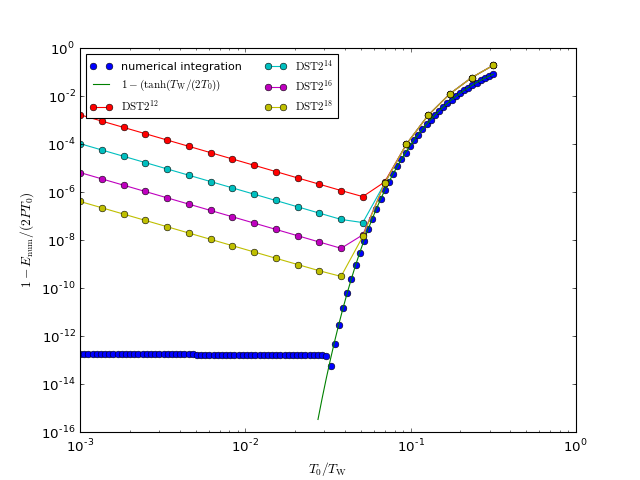

<IPython.core.display.Javascript object>


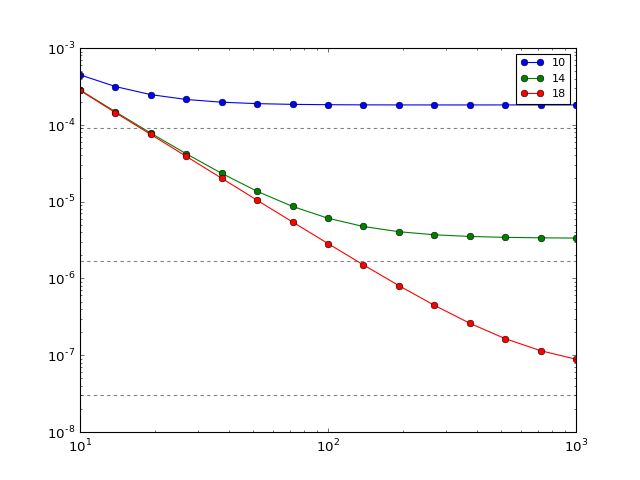

<IPython.core.display.Javascript object>


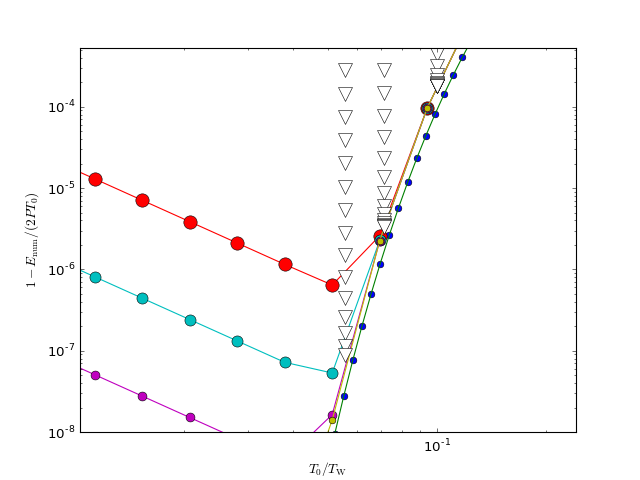

(1e-08, 0.001)

In [112]:
#
# ENERGY DIFFERENCE over T0/TW
#

plt.figure()
plt.loglog( EcutM[:,0], np.abs(  EcutM[:,1]), 'o', label="numerical integration")
plt.plot( EcutM[:,0], ecutrel(EcutM[:,0]), label=r"$1-({\rm tanh}(T_{\rm W}/(2T_0))$")
plt.xlabel(r"$T_0 / T_{\rm W}$")
plt.ylabel(r"$1-E_{\rm num}/ (2PT_0)$")
for N in NN:
    EM = ENNdict[str(N)]
    plt.plot( EM[:,0], EM[:,1], 'o-', label=r"${\rm DST} 2^{%d}$"%N)   
    
plt.legend(loc=0,ncol=2)


#
# ENERGY DIFFERENCE over point density
#
plt.figure()
for f2 in twt0s:
    EM = EDENSDICT[str(f2)]
    #print(EM)
    plt.loglog( EM[:,0], EM[:,1],'o-', label=str(f2))
    plt.axhline(y  = ecutrel(1/f2), dashes=(3,3), c='0.5')
plt.legend(loc=0)
    
    
#
# Put the figs together
#
plt.figure()
plt.loglog( EcutM[:,0], np.abs(  EcutM[:,1]), 'o', label="numerical integration")
plt.plot( EcutM[:,0], ecutrel(EcutM[:,0]), label=r"$1-({\rm tanh}(T_{\rm W}/(2T_0))$")
plt.xlabel(r"$T_0 / T_{\rm W}$")
plt.ylabel(r"$1-E_{\rm num}/ (2PT_0)$")
ms = 12
for N in NN:
    EM = ENNdict[str(N)]
    plt.plot( EM[:,0], EM[:,1], 'o-', label=r"${\rm DST} 2^{%d}$"%N, ms = ms )   
    ms = ms -2
    
    
for f2 in twt0s:
    EM = EDENSDICT[str(f2)]
    #print(EM)
    plt.loglog( 1./EM[:,2], EM[:,1],   'v', ms=12, mfc="1.0", label=str(f2))
    #plt.loglog( 1/EM[:,2], EM[:,1], 'v', ms=12, mfc="1.0")
plt.ylim([1e-8,1e-3])
#plt.legend(loc=0,ncol=2)

In [78]:
EDENSDICT['10']
for k in EDENSDICT.keys():
    print(k)


__version__
20
__header__
10
__globals__


dict_keys(['14', '__header__', '12', '16', '__version__', '18', '__globals__'])

# RK4 Test


<IPython.core.display.Javascript object>


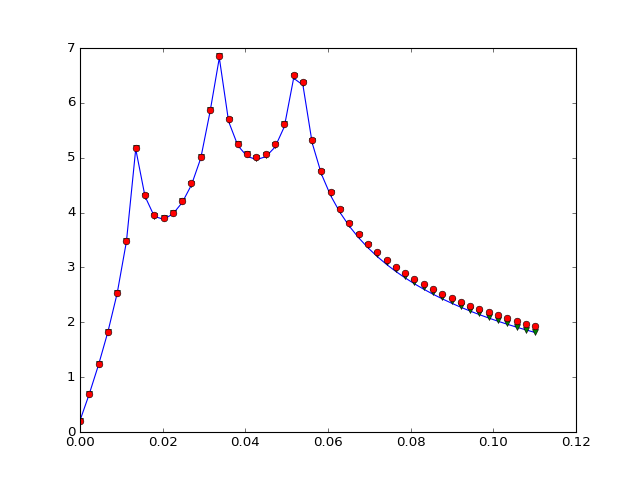

[ -8.04999417e-01 +1.01483094e-01j  -4.93683479e-01 +6.94488697e-02j
  -2.88322239e-01 +4.47244977e-02j  -1.58012120e-01 +2.80112999e-02j
  -7.73686190e-02 +1.70935924e-02j  -2.89560075e-02 +1.00421914e-02j
  -1.28653509e-03 +5.52182733e-03j   1.31478700e-02 +2.65609282e-03j
   1.92626753e-02 +8.75687091e-04j   2.02878796e-02 -1.90427555e-04j
   1.83511056e-02 -7.85940171e-04j   1.48529412e-02 -1.07226191e-03j
   1.07105346e-02 -1.15712821e-03j   6.51733205e-03 -1.11288355e-03j
   2.64894026e-03 -9.88295829e-04j  -6.66019785e-04 -8.16279381e-04j
  -3.29807253e-03 -6.19001873e-04j  -5.18434798e-03 -4.11298020e-04j
  -6.30632006e-03 -2.02974224e-04j  -6.67451494e-03 -3.78271164e-07j
  -6.31798513e-03 +1.92523244e-04j  -5.27706577e-03 +3.73400561e-04j
  -3.59840470e-03 +5.41043761e-04j  -1.33157510e-03 +6.95002284e-04j
   1.47320677e-03 +8.35332936e-04j   4.76659085e-03 +9.62423595e-04j
   8.50106190e-03 +1.07687000e-03j   1.26315308e-02 +1.17938992e-03j
   1.71156634e-02 +1.27076382e-03j

In [131]:
def calc_ab_rk4( dx, L, q, zeta ):
    def fpk(qii, zetai):
            return np.array( [[-1.0j * zetai, qii],[-np.conj(qii), 1.0j * zetai]] )        
    a=np.zeros(len(zeta), dtype=complex)
    b=np.zeros(len(zeta), dtype=complex)
    for i in range(len(zeta)):
        v = np.zeros([len(q),2],dtype=complex)
        #calculate the first two elements of v
        v[0,:] = np.array([1,0]) * np.exp( -1.0j * zeta[i] * -L)               
        p0 = np.array( [[-1.0j * zeta[i], q[0]],[-np.conj(q[0]), 1.0j * zeta[i]]] )
        v[1,:] = v[0,:] + dx * np.dot(p0, v[0,:])       
        
        for ii in range(0,len(q)-2):
            k1 = np.dot( fpk( q[ii], zeta[i]) , v[ii])
            k2 = np.dot( fpk( q[ii+1], zeta[i]), v[ii] + dx * k1)
            k3 = np.dot( fpk( q[ii+1], zeta[i]), v[ii] + dx * k2)
            k4 = np.dot( fpk( q[ii++2], zeta[i]), v[ii] + 2 * dx *k3)           
            v[ii+2,:] = v[ii,:] + 2 * dx * 1./6 *( k1 + 2*k2 + 2*k3 + k4)               
        a[i] = v[-1,0] * np.exp(1.0j * zeta[i] * L)
        b[i] = v[-1,1] * np.exp(-1.0j * zeta[i] * L)
    return a, b


def pmax(t0): 
	return np.abs(b2)/gamma / t0**2
b2 = -23e-27
gamma = 0.0037
t0 = 1e-12
fr=0.05
tvec=np.linspace(-10e-12,10e-12,2**10)
t0 = fr * 20e-12
p = pmax(t0)
feld = 3.2* np.sqrt(p) / np.cosh( tvec/t0) * np.exp( -1.0j * 2 * np.pi * .01e12 * tvec)
dt = tvec[2]-tvec[1]

dob = DSTObj(feld, tvec, b2, gamma)
zetas = np.linspace(0, 1.1*dob.zetamax)
a,b = dob.calc_ab(1.0j * zetas)
af,bf = dob.calc_ab(1.0j * zetas, method='CN')
a2,b2 = calc_ab_rk4(dob.dx, dob.L, dob.q, 1.0j * zetas)
plt.figure()
plt.plot( zetas, np.log(1./np.abs(a)))
plt.plot( zetas, np.log(1./np.abs(af)),'v')
plt.plot( zetas, np.log(1./np.abs(a2)),'o')
print(a2)


0.00316227766017  * 0.0063095734448  * 0.0125892541179  * 0.0251188643151  * 0.0501187233627  * 0.1  * 0.199526231497  * 0.398107170553  * 

<IPython.core.display.Javascript object>


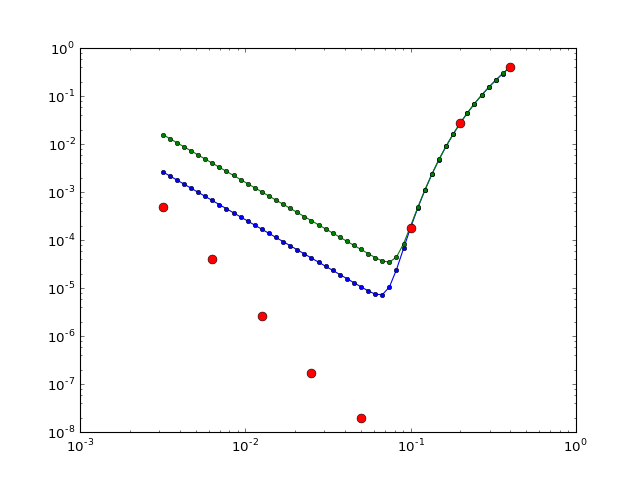

0.00316227766017  * 0.0063095734448  * 0.0125892541179  * 0.0251188643151  * 0.0501187233627  * 0.1  * 0.199526231497  * 0.398107170553  * 

<IPython.core.display.Javascript object>


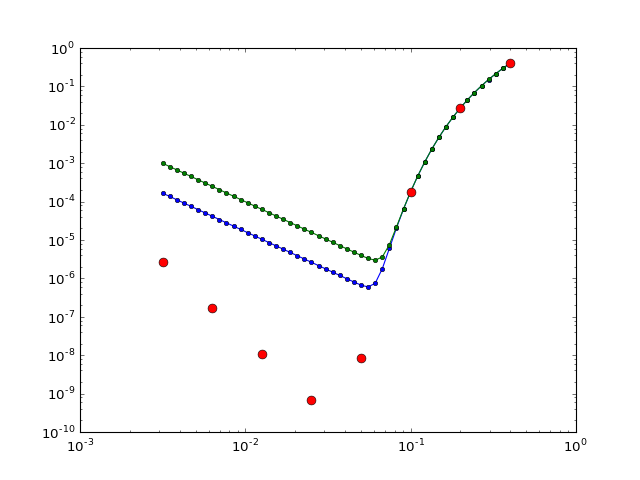

In [3]:


def pfloop3(do, inizetas, Meth, verbose=False, iterations=10):
	zetas = inizetas
	for i in range(iterations):
		aa,bb = do.calc_ab(1.0j*zetas, method=Meth)
		la = np.log(1./np.abs(aa)) 
		pl = pyfindpeaks(5,la,0)
		zpeak = zetas[pl[0]]
		zetas = np.linspace( (1-0.05**i)* zpeak, (1+0.05**i)*zpeak,len(inizetas))
		if verbose:
			if i==0:
				plt.figure()
				plt.plot(zetas,la)
				plt.plot(zetas[pl],la[pl],'o' )
			print("%d - %e	  la = %e"%(i, zpeak*4.0/do.energyfactor, la[pl[0]]))
	return zpeak
#
# ATTENTION: this literally can take HOURS
#
if True:
    from optictools import pyfindpeaks
    for NN in [10,12]:
        algos = ['RK4','AL','CD']    
        fracslo = 10**np.linspace(-2.5,-0.4,8)
        fracshi = 10**np.linspace(-2.5,-0.4,50)

        FRACM=[]
        FRACMTM = []
        for frac in fracslo:
            print(frac," * ",end="")
            tvec=np.linspace(-10e-12,10e-12,2**NN)
            t0 = frac * 20e-12
            p = pmax(t0)
            esol = 2 * t0 * p
            feld = 1.0* np.sqrt(p) / np.cosh( tvec/t0) #* np.exp( -1.0j * 2 * np.pi * .01e12 * tvec)
            dob = DSTObj( feld, tvec, b2, gamma)
            inizetas = np.linspace(1e-8,1.1 * dob.zetamax,50)
            ALGOM = [frac]
            for i in range(len(algos)):        
                zm = pfloop3(dob, inizetas, algos[i])
                ALGOM.append(1-zm*4.0/dob.energyfactor/esol)    
            FRACM.append(ALGOM)

        for frac in fracshi:
            tvec=np.linspace(-10e-12,10e-12,2**NN)
            t0 = frac * 20e-12
            p = pmax(t0)
            esol = 2 * t0 * p
            feld = 1.0* np.sqrt(p) / np.cosh( tvec/t0) #* np.exp( -1.0j * 2 * np.pi * .01e12 * tvec)
            dob = DSTObj( feld, tvec, b2, gamma)
            inizetas = np.linspace(1e-8,1.1 * dob.zetamax,50)
            zm = pfloop3(dob, inizetas,'TMC')
            zm2 = pfloop3(dob, inizetas,'FDC')
            FRACMTM.append([frac, np.abs (1-zm*4.0 / dob.energyfactor / esol),
                           np.abs (1-zm2*4.0 / dob.energyfactor / esol)])
        F=np.abs( np.array( FRACM))
        FRef = np.abs( np.array(FRACMTM))
        plt.figure()
        plt.loglog(FRef[:,0], FRef[:,1], 'o-', ms=4, label = "REF TMC")
        plt.loglog(FRef[:,0], FRef[:,2], 'o-', ms=4, label = "REF FDC")
        plt.loglog(F[:,0], F[:,1],'o', label = "RK4", ms=8)
        
        #np.savetxt("testdata/algs%d.dat"%NN, F)
        #np.savetxt("testdata/ref%d.dat"%NN, FRef)
        #plt.xlabel(r"$T_0 / T_{\rm Window}$")
        #plt.ylabel(r"$1 - E_{\rm DST}/E_{\rm sol}$")    
        #plt.legend(loc=0)
        #plt.savefig("testdata/%d.pdf"%NN)